<a href="https://colab.research.google.com/github/VishwasAggarwal23/Cureya-Internship/blob/main/Copy_of__fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# week-6 Task

## Fraud detection


# Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

Reading the dataset

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data=pd.read_csv(r'/Credit_Card_Applications.csv')
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


Creating dependent and indepedent variable

In [8]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values 

Data preprocessing

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

installing minisom

In [10]:
!pip install minisom


  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=1b5fb1095425fbd078d1937d162ad94720c6a1d92153f3c46719412330c2f341
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [11]:

from minisom import MiniSom

In [12]:
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)

In [13]:
som.random_weights_init(X)

Training the SOM on X

In [14]:
som.train_random(data=X, num_iteration=100)

Visualizing the data

In [15]:
from pylab import bone, pcolor, colorbar, plot, show

In [16]:
plt.figure(figsize = (20,10))
# Step 4.1 - initializing the figure (the window having the map)
bone()

<Figure size 1440x720 with 0 Axes>

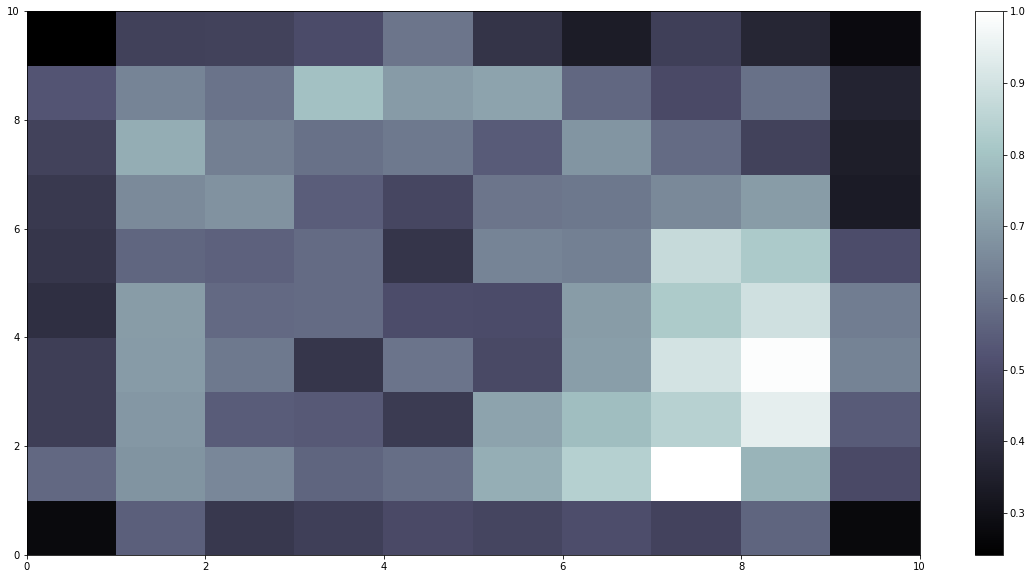

In [17]:
plt.figure(figsize = (20,10))
bone()
pcolor(som.distance_map().T)
colorbar()

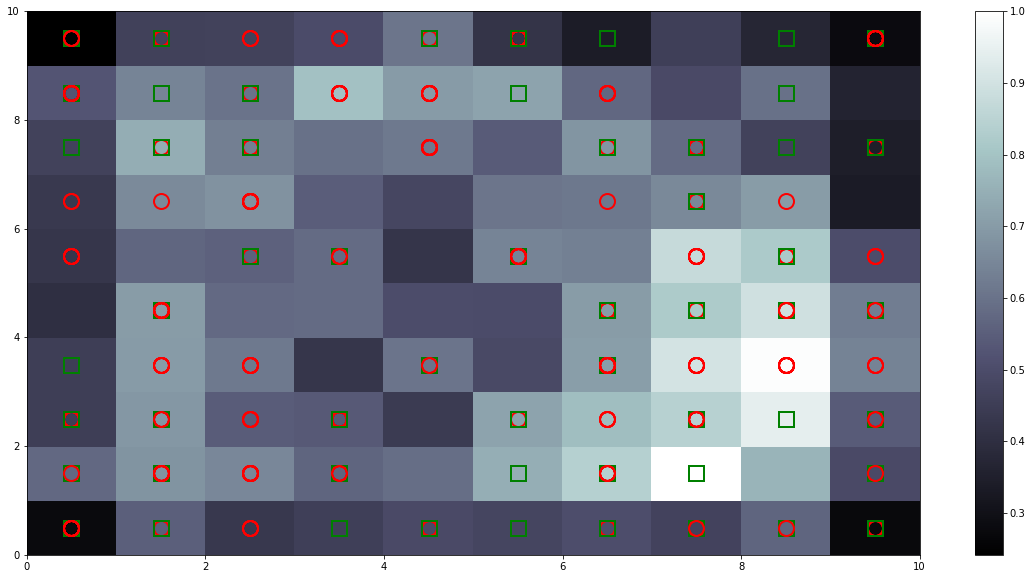

In [18]:
plt.figure(figsize = (20,10))
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['red', 'green']
for i, j in enumerate(X):          
    wn = som.winner(j)             
    plot(wn[0] + 0.5, wn[1] + 0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize=15,
                markeredgewidth = 2)  
    
show()


In [19]:
mappings = som.win_map(X)
mappings

defaultdict(list,
            {(0,
              0): [array([0.13505039, 1.        , 0.67413534, 0.09678571, 0.5       ,
                     0.53846154, 0.375     , 0.08473684, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.16      , 0.        ]), array([0.28452042, 1.        , 0.14541353, 0.03571429, 0.5       ,
                     0.53846154, 0.375     , 0.01754386, 0.        , 0.        ,
                     0.        , 1.        , 0.        , 0.14      , 0.        ]), array([2.00689547e-01, 1.00000000e+00, 3.07067669e-01, 1.87500000e-01,
                     5.00000000e-01, 6.15384615e-01, 3.75000000e-01, 2.98245614e-03,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
                     5.00000000e-01, 1.45000000e-01, 6.00000000e-05]), array([0.11651831, 1.        , 0.2793985 , 0.08928571, 0.5       ,
                     0.53846154, 0.375     , 0.04385965, 0.        , 0.        ,
                     0. 

In [20]:
frauds = np.concatenate((mappings[(1, 2)], mappings[(6, 8)]), axis = 0)

In [21]:
frauds = sc.inverse_transform(frauds)
df_frauds = pd.DataFrame(frauds)

In [22]:
df_frauds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15686461.0,1.0,25.00,12.500,2.0,6.0,4.0,3.000,1.0,0.0,0.0,1.0,1.0,20.0,1.0
1,15686885.0,1.0,37.17,4.000,2.0,8.0,5.0,5.000,1.0,0.0,0.0,1.0,1.0,280.0,1.0
2,15585928.0,1.0,48.50,4.250,2.0,7.0,4.0,0.125,1.0,0.0,0.0,1.0,2.0,225.0,1.0
3,15680895.0,1.0,32.33,7.500,2.0,10.0,5.0,1.585,1.0,0.0,0.0,1.0,1.0,420.0,1.0
4,15583067.0,1.0,21.83,0.250,2.0,2.0,8.0,0.665,1.0,0.0,0.0,1.0,2.0,0.0,1.0
5,15623072.0,1.0,31.57,0.500,2.0,8.0,5.0,0.835,1.0,0.0,0.0,1.0,1.0,320.0,1.0
6,15587038.0,1.0,19.33,9.500,2.0,11.0,4.0,1.000,1.0,0.0,0.0,1.0,2.0,60.0,401.0
7,15592773.0,1.0,31.83,2.500,2.0,6.0,4.0,7.500,1.0,0.0,0.0,1.0,2.0,523.0,1.0
8,15588854.0,1.0,26.00,1.000,2.0,11.0,4.0,1.750,1.0,0.0,0.0,1.0,2.0,280.0,1.0
9,15722535.0,1.0,23.00,0.750,2.0,7.0,4.0,0.500,1.0,0.0,0.0,1.0,1.0,320.0,1.0


In [23]:
customers = data.iloc[:,1:].values
is_fraud = np.zeros(len(data))
for i in range(len(data)):
    if data.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [24]:
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [25]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 5)
y_pred = classifier.predict(customers)
y_pred = np.concatenate((data.iloc[:,0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:,1].argsort()]

Epoch 1/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1787 - accuracy: 0.9783
Epoch 2/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1271 - accuracy: 0.9783
Epoch 3/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1142 - accuracy: 0.9783
Epoch 4/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1122 - accuracy: 0.9783
Epoch 5/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1068 - accuracy: 0.9783


In [26]:
df = pd.DataFrame(y_pred, columns=['Customers','Fraud_probability'])
df

,Customers,Fraud_probability
0,15762716.0,0.000000e+00
1,15598802.0,0.000000e+00
2,15790113.0,0.000000e+00
3,15664615.0,0.000000e+00
4,15708714.0,2.723867e-37
...,...,...
685,15643056.0,1.576931e-01
686,15599152.0,1.610555e-01
687,15659100.0,1.672699e-01
688,15716082.0,1.771917e-01
